In [1]:
using BenchmarkTools
using Plots
include("funciones_de_red.jl")

EuclideanHeuristic (generic function with 1 method)

## Random and square graphs

In [2]:
n=200
RandNet, position_array_Rand, weight_matrix_Rand = mySimpleGraph(n);
#gplot(RandNet,nodelabel=1:n)

In [3]:
k = 20
SquareNet, position_array_Square, weight_matrix_Square = SquareDiGraph(k);
#gplot(SquareNet, nodelabel=1:k^2)

## Benchmarking A* vs Dijkstra

A* search evaluates what next step to take by combining the cost to reach the node $g(n)$ and an estimation of the cost to get from that node to the destination $h(n)$.

So it calculates a function $f(n) = g(n) + h(n)$ and proceeds to move to the node that minimizes it.

$h(n)$ will include memory of the drivers

In [4]:
origin_sq = rand(1:k^2)
destination_sq = rand(1:k^2)
println("$origin_sq - $destination_sq")

291 - 150


In [5]:
origin_rand = rand(1:n)
destination_rand = rand(1:n)
println("$origin_rand - $destination_rand")

149 - 108


#### Dijkstra is just A* with heuristic $h(n) = 0$

In [6]:
LightGraphs.a_star(SquareNet,origin_sq,destination_sq,weight_matrix_Square)

8-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 291 => 271
 Edge 271 => 251
 Edge 251 => 231
 Edge 231 => 211
 Edge 211 => 191
 Edge 191 => 171
 Edge 171 => 151
 Edge 151 => 150

In [7]:
@benchmark LightGraphs.a_star(SquareNet,origin_sq,destination_sq, weight_matrix_Square)

BenchmarkTools.Trial: 
  memory estimate:  63.13 KiB
  allocs estimate:  2021
  --------------
  minimum time:     240.393 μs (0.00% GC)
  median time:      260.526 μs (0.00% GC)
  mean time:        316.765 μs (2.89% GC)
  maximum time:     9.161 ms (92.30% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [8]:
LightGraphs.a_star(RandNet,origin_rand,destination_rand,weight_matrix_Rand)

2-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 149 => 102
 Edge 102 => 108

In [9]:
@benchmark LightGraphs.a_star(RandNet,origin_rand,destination_rand,weight_matrix_Rand)

BenchmarkTools.Trial: 
  memory estimate:  39.05 KiB
  allocs estimate:  997
  --------------
  minimum time:     107.846 μs (0.00% GC)
  median time:      110.757 μs (0.00% GC)
  mean time:        121.677 μs (3.59% GC)
  maximum time:     5.855 ms (97.27% GC)
  --------------
  samples:          10000
  evals/sample:     1

#### To use A* we need to define an heuristic function

In [10]:
LightGraphs.a_star(SquareNet,origin_sq, destination_sq,weight_matrix_Square,
    n -> EuclideanHeuristic(n,destination_sq,position_array_Square))

8-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 291 => 271
 Edge 271 => 251
 Edge 251 => 231
 Edge 231 => 211
 Edge 211 => 191
 Edge 191 => 171
 Edge 171 => 151
 Edge 151 => 150

In [11]:
@benchmark LightGraphs.a_star(SquareNet,origin_sq,destination_sq,weight_matrix_Square,
    n -> EuclideanHeuristic(n,destination_sq,position_array_Square))

BenchmarkTools.Trial: 
  memory estimate:  28.52 KiB
  allocs estimate:  447
  --------------
  minimum time:     65.085 μs (0.00% GC)
  median time:      68.325 μs (0.00% GC)
  mean time:        85.813 μs (5.05% GC)
  maximum time:     9.545 ms (97.78% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [12]:
LightGraphs.a_star(RandNet,origin_rand, destination_rand,weight_matrix_Rand,
    n -> EuclideanHeuristic(n,destination_rand,position_array_Rand))

2-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 149 => 102
 Edge 102 => 108

In [13]:
@benchmark LightGraphs.a_star(RandNet,origin_rand,destination_rand,weight_matrix_Rand,
    n -> EuclideanHeuristic(n,destination_rand,position_array_Rand))

BenchmarkTools.Trial: 
  memory estimate:  20.61 KiB
  allocs estimate:  390
  --------------
  minimum time:     45.314 μs (0.00% GC)
  median time:      47.724 μs (0.00% GC)
  mean time:        50.952 μs (4.31% GC)
  maximum time:     5.626 ms (98.09% GC)
  --------------
  samples:          10000
  evals/sample:     1

## Time growth function

### Random network

In [14]:
dijkstra_randNet_times = []
for n in 2:50:1000
    origin_rand = rand(1:n);
    destination_rand = rand(1:n);
    RandNet, position_array_Rand, weight_matrix_Rand = mySimpleGraph(n);
    t = @benchmark LightGraphs.a_star(RandNet,origin_rand,destination_rand,weight_matrix_Rand);
    push!(dijkstra_randNet_times,mean(t).time)
end

In [15]:
as_randNet_times = []
for n in 2:50:1000
    origin_rand = rand(1:n);
    destination_rand = rand(1:n);
    RandNet, position_array_Rand, weight_matrix_Rand = mySimpleGraph(n);
    t = @benchmark LightGraphs.a_star(RandNet,origin_rand,destination_rand,weight_matrix_Rand,
    n -> EuclideanHeuristic(n,destination_rand,position_array_Rand));
    push!(as_randNet_times,mean(t).time)
end

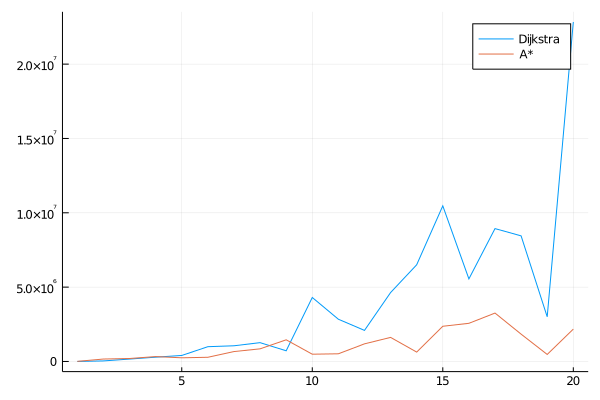

In [16]:
plot(dijkstra_randNet_times,label="Dijkstra")
plot!(as_randNet_times, label="A*")

### Square network

In [17]:
dijkstra_SqNet_times = []
for k in 2:20:100
    origin_sq = rand(1:k^2);
    destination_sq = rand(1:k^2);
    SquareNet, position_array_Square, weight_matrix_Square = SquareDiGraph(k);
    t = @benchmark LightGraphs.a_star(SquareNet,origin_sq, destination_sq,weight_matrix_Square);
    push!(dijkstra_SqNet_times,mean(t).time)
end

In [18]:
as_SqNet_times = []
for k in 2:20:100
    origin_sq = rand(1:k^2);
    destination_sq = rand(1:k^2);
    SquareNet, position_array_Square, weight_matrix_Square = SquareDiGraph(k);
    t = @benchmark LightGraphs.a_star(SquareNet,origin_sq, destination_sq,weight_matrix_Square,
    n -> EuclideanHeuristic(n,destination_sq,position_array_Square));
    push!(as_SqNet_times,mean(t).time)
end

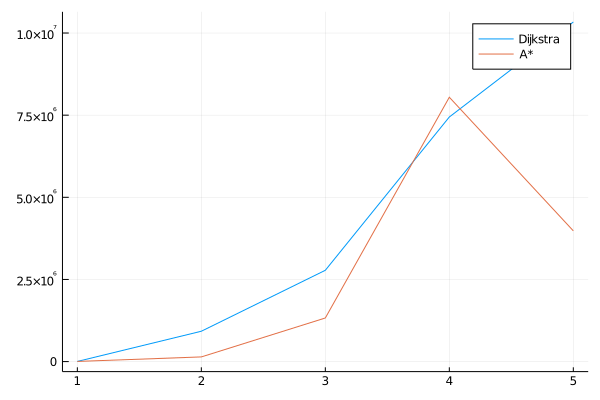

In [19]:
plot(dijkstra_SqNet_times,label="Dijkstra")
plot!(as_SqNet_times, label="A*")

## Understanding A*

In [ ]:
# Parts of this code were taken / derived from Graphs.jl. See LICENSE for
# licensing details.

# A* shortest-path algorithm

function reconstruct_path!(total_path, # a vector to be filled with the shortest path
    came_from, # a vector holding the parent of each node in the A* exploration
    end_idx, # the end vertex
    g) # the graph

    E = edgetype(g)
    curr_idx = end_idx
    while came_from[curr_idx] != curr_idx
        pushfirst!(total_path, E(came_from[curr_idx], curr_idx))
        curr_idx = came_from[curr_idx]
    end
end

function a_star_impl!(g, # the graph
    goal, # the end vertex
    open_set, # an initialized heap containing the active vertices
    closed_set, # an (initialized) color-map to indicate status of vertices
    g_score, # a vector holding g scores for each node
    f_score, # a vector holding f scores for each node
    came_from, # a vector holding the parent of each node in the A* exploration
    distmx,
    heuristic)

    E = edgetype(g)
    total_path = Vector{E}()

    @inbounds while !isempty(open_set)
        current = dequeue!(open_set)

        if current == goal
            reconstruct_path!(total_path, came_from, current, g)
            return total_path
        end

        closed_set[current] = true

        for neighbor in LightGraphs.outneighbors(g, current)
            closed_set[neighbor] && continue

            tentative_g_score = g_score[current] + distmx[current, neighbor]

            if tentative_g_score < g_score[neighbor]
                g_score[neighbor] = tentative_g_score
                priority = tentative_g_score + heuristic(neighbor)
                open_set[neighbor] = priority
                came_from[neighbor] = current
            end
        end
    end
    return total_path
end

"""
    a_star(g, s, t[, distmx][, heuristic])
Return a vector of edges comprising the shortest path between vertices `s` and `t`
using the [A* search algorithm](http://en.wikipedia.org/wiki/A%2A_search_algorithm).
An optional heuristic function and edge distance matrix may be supplied. If missing,
the distance matrix is set to [`LightGraphs.DefaultDistance`](@ref) and the heuristic is set to
`n -> 0`.
"""
function a_star(g::AbstractGraph{U},  # the g
    s::Integer,                       # the start vertex
    t::Integer,                       # the end vertex
    distmx::AbstractMatrix{T}=weights(g),
    heuristic::Function=n -> zero(T)) where {T, U}

    E = Edge{eltype(g)}

    # if we do checkbounds here, we can use @inbounds in a_star_impl!
    checkbounds(distmx, Base.OneTo(nv(g)), Base.OneTo(nv(g)))

    open_set = PriorityQueue{Integer, T}()
    enqueue!(open_set, s, 0)

    closed_set = zeros(Bool, nv(g))

    g_score = fill(Inf, nv(g))
    g_score[s] = 0

    f_score = fill(Inf, nv(g))
    f_score[s] = heuristic(s)

    came_from = -ones(Integer, nv(g))
    came_from[s] = s

    a_star_impl!(g, t, open_set, closed_set, g_score, f_score, came_from, distmx, heuristic)
end

TODO:
- Pasar ordenado a archivo
- Tests of growth of time for both algorithms
- Modify heuristic to include time
- Nueva funcion de pesos modificada con el algoritmo BPR
- Modificar A* para que no reabra caminos
- Creación de red cuadrada con una diagonal

Para después:
- Hacer simulaciones con autos
- Buscar estados estacionarios
- Pruebas en redes cuadradas y redes cuadradas con diagonal

In [ ]:
methods(LightGraphs.a_star)